In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/raw/2024_batting_stats.csv')
df['BIP'] = df['AB'] - df['SO'] - df['HR'] + df['SF']

In [2]:
# Bins testing
# df['bin'] = pd.cut(df['PA'], bins=np.arange(start=0, stop=df['PA'].max(), step=25), right=True)
# counts = df.groupby('bin', observed=False)['PA'].count()
# print(counts.head(30))

# df['bin'] = pd.cut(df['AB'], bins=np.arange(start=0, stop=df['AB'].max(), step=25), right=True)
# counts = df.groupby('bin', observed=False)['AB'].count()
# print(counts.head(30))

# df['bin'] = pd.cut(df['BIP'], bins=np.arange(start=0, stop=df['BIP'].max(), step=25), right=True)
# counts = df.groupby('bin', observed=False)['BIP'].count()
# print(counts.head(30))

df['bin'] = pd.cut(df['Events'], bins=np.arange(start=0, stop=df['Events'].max(), step=25), right=True)
counts = df.groupby('bin', observed=False)['Events'].count()
print(counts.head(30))

bin
(0, 25]       101
(25, 50]       63
(50, 75]       39
(75, 100]      41
(100, 125]     37
(125, 150]     24
(150, 175]     29
(175, 200]     29
(200, 225]     24
(225, 250]     23
(250, 275]     32
(275, 300]     37
(300, 325]     20
(325, 350]     20
(350, 375]     22
(375, 400]     19
(400, 425]     28
(425, 450]     18
(450, 475]     20
(475, 500]     12
(500, 525]      5
(525, 550]      3
(550, 575]      0
(575, 600]      0
Name: Events, dtype: int64


In [3]:
def plot_metric_vars(df, metrics_list, x='PA', normalize=False, nline=False, title=''):
    fig, ax = plt.subplots()
    metrics = [metrics_list] if isinstance(metrics_list, str) else metrics_list
    df['bin'] = pd.cut(df[x], bins=np.arange(start=0, stop=df[x].max(), step=25), right=True)

    # Create plot for each metric
    for metric in metrics:
        # Aggregate variance
        bins = df.groupby('bin', observed=False)[metric].var().reset_index(name=f'{metric}_var')

        if normalize:
            if x == 'PA':
                # Used PA >= 500 because the MLB's qualified hitter requirement is 502 PA
                baseline_var = df[df['PA'] >= 500][metric].var() 
                bins[f'{metric}_var'] = bins[f'{metric}_var']/baseline_var
            elif x == 'AB':
                # 500 PA is roughly equivalent to 425 AB
                baseline_var = df[df['PA'] >= 425][metric].var() 
                bins[f'{metric}_var'] = bins[f'{metric}_var']/baseline_var
            elif x == 'BIP':
                # 500 PA is roughly equivalent to 345 BIP
                baseline_var = df[df['BIP'] >= 345][metric].var() 
                bins[f'{metric}_var'] = bins[f'{metric}_var']/baseline_var
            elif x == 'Events':
                # Used the same cutoff as BIP
                baseline_var = df[df['Events'] >= 345][metric].var() 
                bins[f'{metric}_var'] = bins[f'{metric}_var']/baseline_var
            else:
                raise ValueError(f"{x} is not a valid x metric")

        # Calculate bin midpoints
        bins['mid'] = bins['bin'].apply(lambda x: (x.left + x.right) / 2)

        # Plot
        ax.plot(bins['mid'], bins[f'{metric}_var'], label=metric)

        if normalize and nline:
            ax.axhline(y=1, color='black')

    # Format plot
    if title: ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel('Variance')
    ax.legend()

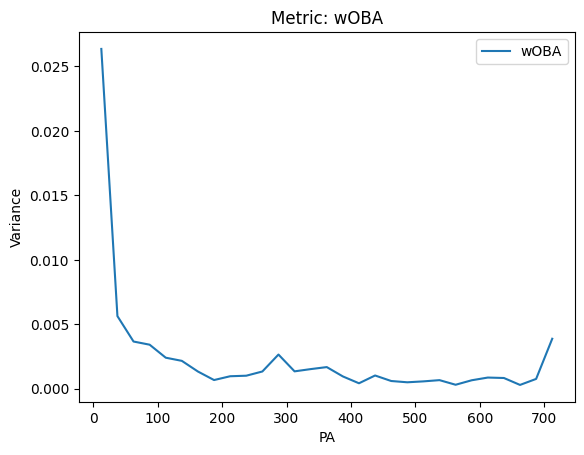

In [4]:
plot_metric_vars(df, 'wOBA', title='Metric: wOBA')
# Variance starts stabilizing around 200 PA

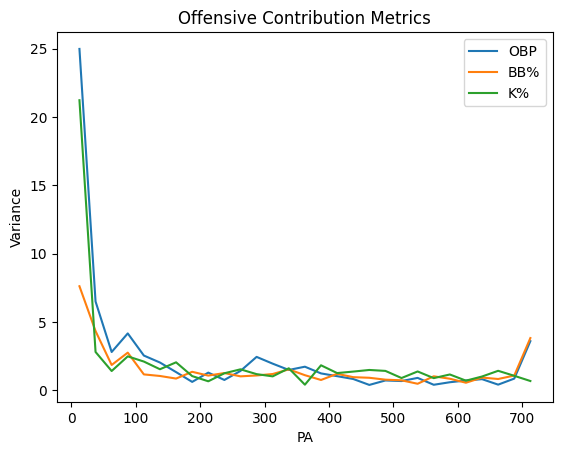

In [5]:
plot_metric_vars(df, ['OBP', 'BB%', 'K%'], normalize=True, title='Offensive Contribution Metrics')
# Variance starts stabilizing around 200 PA

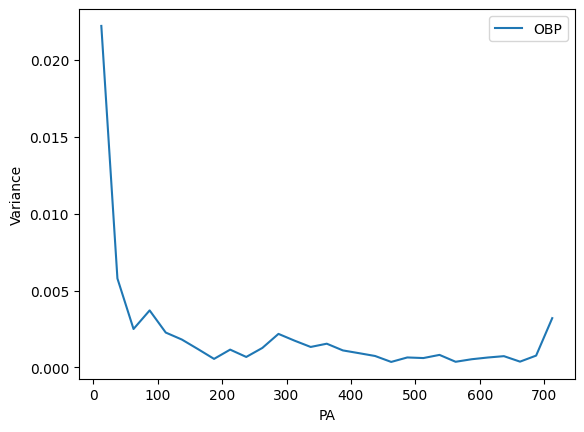

In [6]:
plot_metric_vars(df, 'OBP')
# Starts stabilizing around 200 PA, Carleton says 460

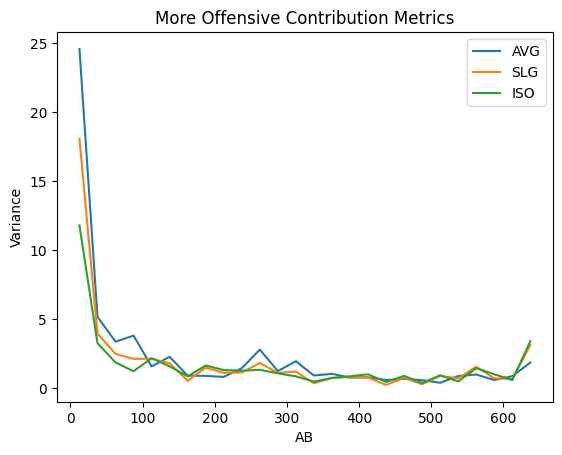

In [7]:
plot_metric_vars(df, ['AVG', 'SLG', 'ISO'], x='AB', normalize=True, title='More Offensive Contribution Metrics')
# Variance starts stabilizing around 200 AB

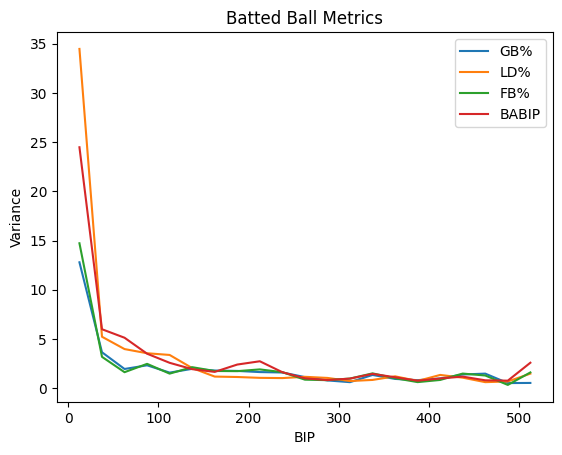

In [8]:
plot_metric_vars(df, ['GB%', 'LD%', 'FB%', 'BABIP'], x='BIP', normalize=True, title='Batted Ball Metrics')
# Variance starts stabilizing around 150 BIP

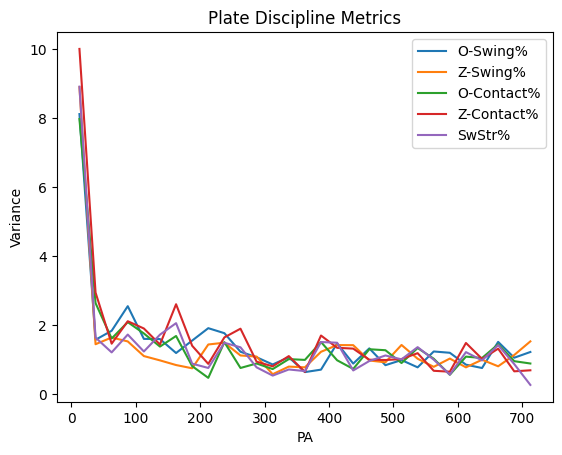

In [9]:
plot_metric_vars(df, ['O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'SwStr%'], normalize=True, title='Plate Discipline Metrics')
# Variance starts stabilizing around 350 PA (Note: PA isn't the denominator for these metrics)

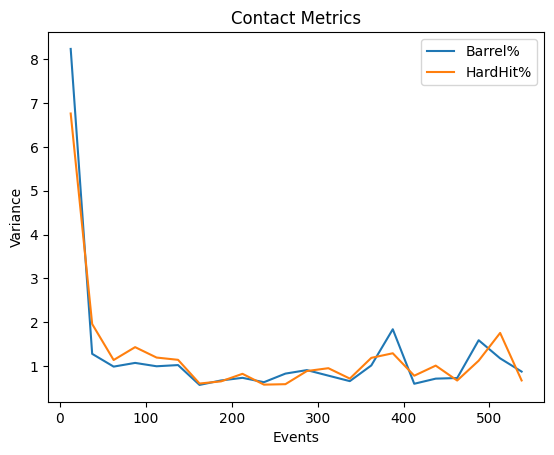

In [10]:
plot_metric_vars(df, ['Barrel%', 'HardHit%'], x='Events', normalize=True, title='Contact Metrics')
# Variance stabilizes around 150 Events (Batted Balls)

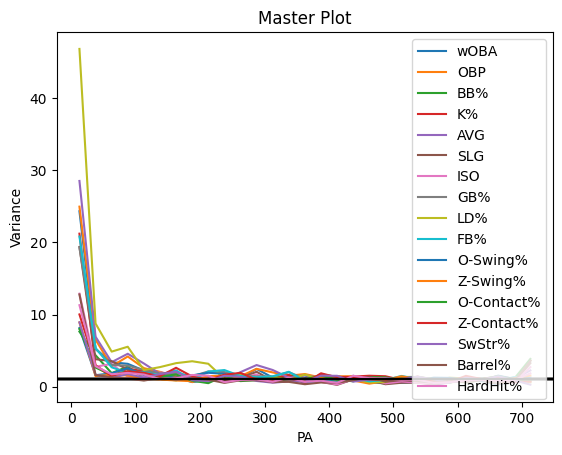

In [11]:
plot_metric_vars(
    df, 
    ['wOBA', 'OBP', 'BB%', 'K%', 'AVG', 'SLG', 'ISO', 'GB%', 'LD%', 'FB%', 'O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'SwStr%', 
     'Barrel%', 'HardHit%'],
    normalize=True,
    nline=True,
    title='Master Plot'
)

In [12]:
df_cut = df[df['PA'] >= 300]
df_cut.shape

(286, 322)

In [13]:
df_cut = df[df['PA'] >= 350]
df_cut.shape

(241, 322)

In [14]:
df_cut = df[df['PA'] >= 400]
df_cut.shape

(207, 322)